# Warehouse Optimization

## Initilization

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_1-6.csv')
data.reset_index(drop=True, inplace=True)
data.dtypes
data.head(10)

,List No,Item No,UPC Code,Manufacturer No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Product Name,...,Cost price,Inventory,Shipping,Profit,STOCK TYPE,Date,In Stock,weight(lb),SaleRate,SaleRateNew
0,2410,CA-SFA,6.720000e+11,CSE-PT91L SLIM FLOPPY ADAPTER,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,Supermicro CSE-PT91L Slim Floppy Drive Kit,...,-2.9500,57,0.0,5.0000,Recurring,01 January 2019,Y,0.90,0.795190,1.000000
1,2094,UPS-APP6B,7.310000e+11,P6B,APC,Surge Protection,Component,Power Protection / UPS,Surge Protection,APC P6B Essential SurgeArrest 6-Outlet 120V Su...,...,8.3025,51,2.5,0.2675,Recurring,01 January 2019,Y,1.33,0.817581,1.457143
2,1524,CA-FANS12,8.450000e+11,SF12025L,Vantec,120mm,Component,Fan & Heatsink,Case Fan,Vantec SF12025L 120mm Quiet Case Fan,...,8.2650,19,2.5,0.2550,Recurring,01 January 2019,Y,0.54,0.879953,1.000000
3,2617,FAN-12MRHP,8.130000e+11,SU1225FD12M-RHP,Scythe,120mm,Component,Fan & Heatsink,Case Fan,Scythe SimplyCool Kaze Flex 120 PWM SU1225FD12...,...,8.2650,19,2.5,0.2550,Recurring,01 January 2019,Y,0.50,0.891189,1.117647
4,1608,KB-US9851M,8.410000e+11,KB-US9851M,iMicro,Keyboard,Component,Input & Output Device,Keyboard,iMicro KB-US9851M Multimedia Wired USB English...,...,8.0700,26,2.5,0.1900,Recurring,01 January 2019,Y,1.20,0.824978,0.714286
5,2005,FAN-BL046,NaN,BL046,be quiet!,120mm,Component,Fan & Heatsink,Case Fan,be quiet! Pure Wings 2 120mm Case Fan,...,8.0700,79,2.5,0.1900,Recurring,01 January 2019,Y,0.34,0.565780,1.000000
6,2402,CA-MCP2663,6.720000e+11,MCP-260-00063-0N,Supermicro,Accessory,Component,Motherboard,Accessory,Supermicro MCP-260-00063-0N Standard I/O Shiel...,...,8.0700,19,2.5,0.1900,Recurring,01 January 2019,Y,1.00,0.195742,0.055556
7,2472,FAN-0556-D,8.410000e+11,CLP0556-D,Thermaltake,LGA 1155,Component,Fan & Heatsink,CPU Fan & Heatsink,Thermaltake CLP0556-D CPU Cooler for Intel LGA...,...,8.0700,51,2.5,0.1900,Recurring,01 January 2019,Y,0.70,0.738709,1.159091
8,3015,VC-DP_DVID,8.400000e+11,CG602-6INCH-WHITE,VCOM,DVI Cable,Component,Cable,DVI Cable,VCOM CG602-6INCH-WHITE 6inch DVI-D Female to D...,...,8.0700,42,2.5,0.1900,Recurring,01 January 2019,Y,0.11,0.830926,1.400000
9,3041,VC-USBARC5,8.400000e+11,CU823-5METER,VCOM,USB Cable,Component,Cable,USB Cable,VCOM CU823-5METER 16ft USB 2.0 Type A Male to ...,...,8.0700,52,2.5,0.1900,Recurring,01 January 2019,Y,0.30,0.814175,1.238095


## Exploratory Analysis

In [2]:
# get some basic ideas about the data
def summerize_data(df, columns):
    for column in columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe())
            
        print('\n')
    
columns = ["Price(USD)", "Inventory", "In Stock", "weight(lb)", "SaleRate", "SaleRateNew"]
summerize_data(data, columns)

Price(USD)
count    4200.000000
mean      284.684874
std       610.347111
min         0.210000
25%        28.190000
50%        84.050000
75%       242.412500
max      7021.250000
Name: Price(USD), dtype: float64


Inventory
count    4200.000000
mean       43.329524
std        90.595148
min         1.000000
25%         5.000000
50%        19.000000
75%        51.000000
max      1002.000000
Name: Inventory, dtype: float64


In Stock
Y    3330
L     870
Name: In Stock, dtype: int64


weight(lb)
count    4200.000000
mean        6.472921
std        13.758992
min         0.000000
25%         0.350000
50%         1.545000
75%         5.490000
max       174.000000
Name: weight(lb), dtype: float64


SaleRate
count    4200.000000
mean        0.638946
std         0.273996
min         0.000000
25%         0.471910
50%         0.747191
75%         0.839462
max         0.981273
Name: SaleRate, dtype: float64


SaleRateNew
count    4200.000000
mean        0.913433
std         1.138135
min         0.0

# Missing Data Points Per Feature

In [3]:
data.isnull().sum()

List No              0
Item No              0
UPC Code           602
Manufacturer No      0
Manufacturer         0
Category             1
Category Path 1      1
Category Path 2      1
Category Path 3    296
Product Name         0
Price(USD)           0
Cost price           0
Inventory            0
Shipping             0
Profit               0
STOCK TYPE           0
Date                 0
In Stock             0
weight(lb)           0
SaleRate             0
SaleRateNew          0
dtype: int64

## Graphs

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

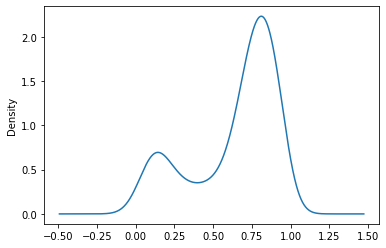

In [5]:
data["SaleRate"].plot.kde(bw_method=0.3)

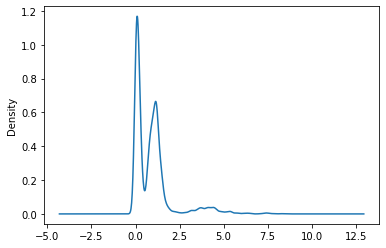

In [6]:
data["SaleRateNew"].plot.kde(bw_method=0.1)

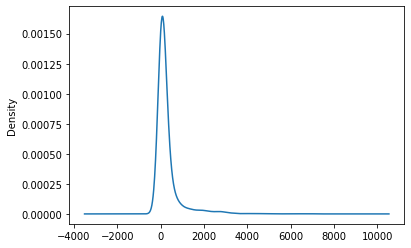

In [7]:
data["Price(USD)"].plot.kde(bw_method=0.3)

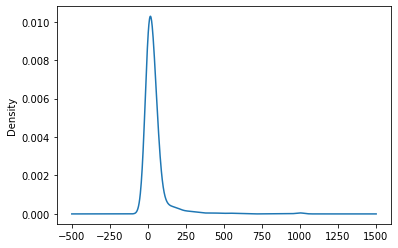

In [8]:
data["Inventory"].plot.kde(bw_method=0.3)

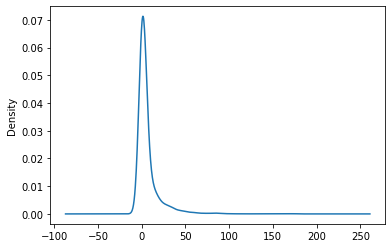

In [9]:
data[ "weight(lb)"].plot.kde(bw_method=0.3)

## corelation matrix

,List No,UPC Code,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRate,SaleRateNew
List No,1.000000,0.128182,-0.030625,-0.030666,-0.134606,0.142054,-0.032798,0.123967,-0.082561,-0.160238
UPC Code,0.128182,1.000000,-0.046991,-0.047030,0.012344,-0.019783,-0.046872,0.010606,0.007696,0.022284
Price(USD),-0.030625,-0.046991,1.000000,0.999997,-0.107053,0.417039,0.999868,0.523939,-0.073705,-0.117940
Cost price,-0.030666,-0.047030,0.999997,1.000000,-0.107130,0.417259,0.999840,0.524009,-0.073645,-0.117988
Inventory,-0.134606,0.012344,-0.107053,-0.107130,1.000000,-0.110415,-0.105828,-0.110241,-0.014032,0.812032
Shipping,0.142054,-0.019783,0.417039,0.417259,-0.110415,1.000000,0.404026,0.791004,-0.127370,-0.145811
Profit,-0.032798,-0.046872,0.999868,0.999840,-0.105828,0.404026,1.000000,0.515137,-0.072435,-0.116340
weight(lb),0.123967,0.010606,0.523939,0.524009,-0.110241,0.791004,0.515137,1.000000,-0.119126,-0.141525
SaleRate,-0.082561,0.007696,-0.073705,-0.073645,-0.014032,-0.127370,-0.072435,-0.119126,1.000000,0.300731
SaleRateNew,-0.160238,0.022284,-0.117940,-0.117988,0.812032,-0.145811,-0.116340,-0.141525,0.300731,1.000000


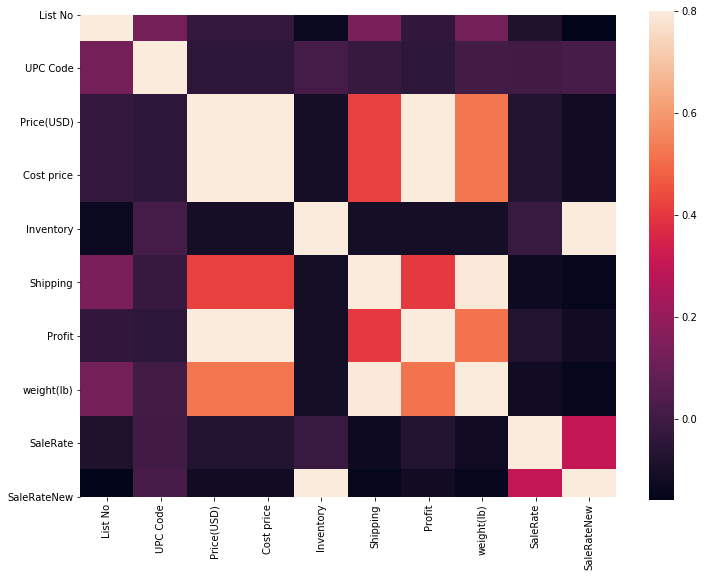

In [10]:
#correlation matrix
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
corrmat

# Relationship with categorical values

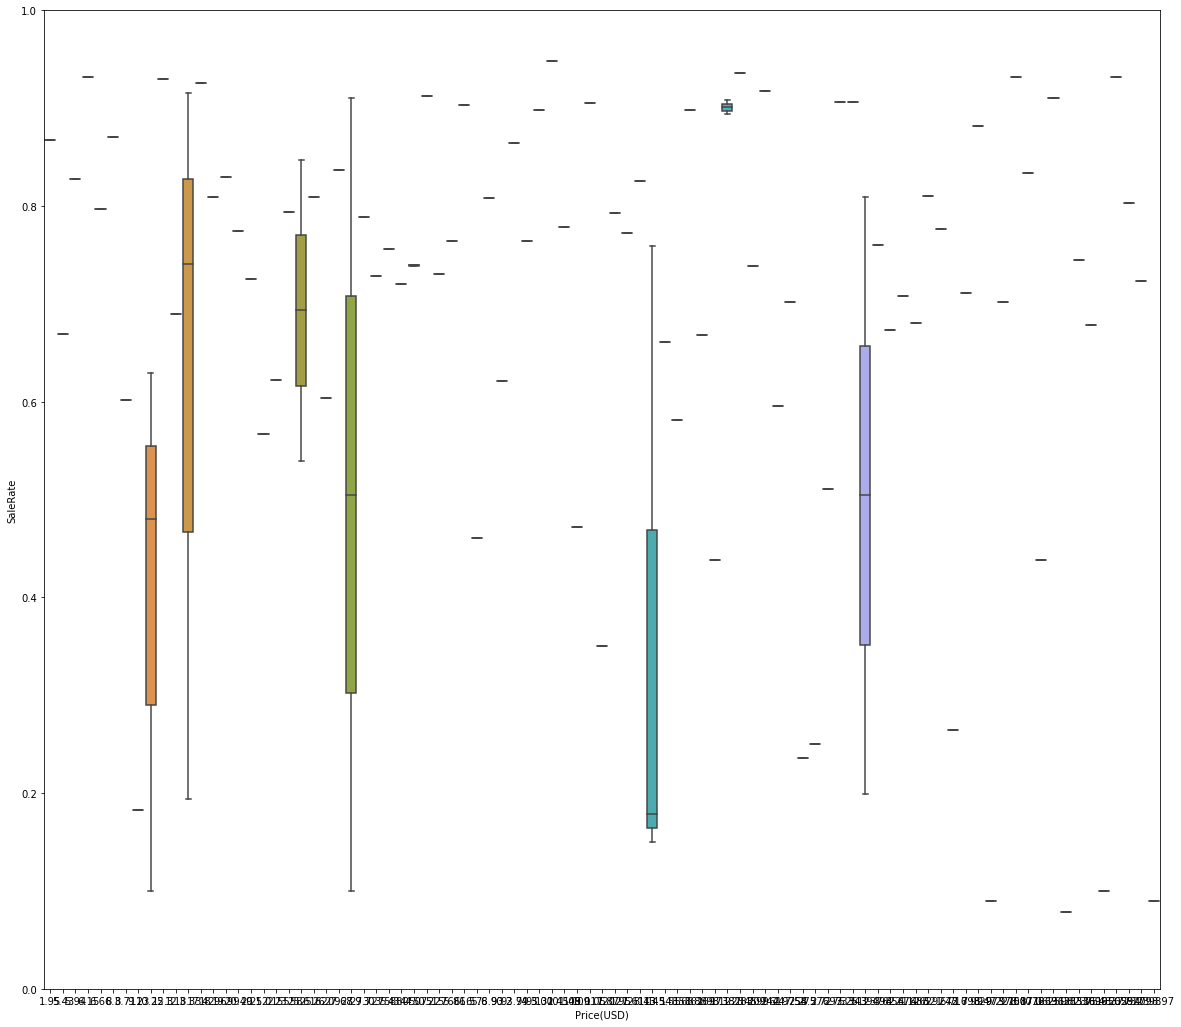

In [11]:
#box plot overallqual/saleprice
box_plot_df = data.sample(n=100, random_state=1)
var = 'Price(USD)'
box_plot_df = pd.concat([box_plot_df['SaleRate'], box_plot_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 18))
fig = sns.boxplot(x=var, y="SaleRate", data=box_plot_df)
fig.axis(ymin=0, ymax=1);

In [20]:
#import pandas_profiling as pp

#check profile report of the dataset

#profile = data.profile_report(title='Pandas Profiling Report')
profile = pandas_profiling.ProfileReport(data)
#profile.to_file("EDA.html")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


# Model

In [13]:
X = data.drop('SaleRateNew', axis=1)
y = data['SaleRateNew']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [14]:
len(data['Category'].unique())

188

In [15]:
# limit to categorical data using df.select_dtypes()
#data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock'], axis=1)
X = data.select_dtypes(include=[object])
X = X.replace(np.nan, 'Default', regex=True)
X.head(30)

,Item No,Manufacturer No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Product Name,STOCK TYPE,Date,In Stock
0,CA-SFA,CSE-PT91L SLIM FLOPPY ADAPTER,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,Supermicro CSE-PT91L Slim Floppy Drive Kit,Recurring,01 January 2019,Y
1,UPS-APP6B,P6B,APC,Surge Protection,Component,Power Protection / UPS,Surge Protection,APC P6B Essential SurgeArrest 6-Outlet 120V Su...,Recurring,01 January 2019,Y
2,CA-FANS12,SF12025L,Vantec,120mm,Component,Fan & Heatsink,Case Fan,Vantec SF12025L 120mm Quiet Case Fan,Recurring,01 January 2019,Y
3,FAN-12MRHP,SU1225FD12M-RHP,Scythe,120mm,Component,Fan & Heatsink,Case Fan,Scythe SimplyCool Kaze Flex 120 PWM SU1225FD12...,Recurring,01 January 2019,Y
4,KB-US9851M,KB-US9851M,iMicro,Keyboard,Component,Input & Output Device,Keyboard,iMicro KB-US9851M Multimedia Wired USB English...,Recurring,01 January 2019,Y
5,FAN-BL046,BL046,be quiet!,120mm,Component,Fan & Heatsink,Case Fan,be quiet! Pure Wings 2 120mm Case Fan,Recurring,01 January 2019,Y
6,CA-MCP2663,MCP-260-00063-0N,Supermicro,Accessory,Component,Motherboard,Accessory,Supermicro MCP-260-00063-0N Standard I/O Shiel...,Recurring,01 January 2019,Y
7,FAN-0556-D,CLP0556-D,Thermaltake,LGA 1155,Component,Fan & Heatsink,CPU Fan & Heatsink,Thermaltake CLP0556-D CPU Cooler for Intel LGA...,Recurring,01 January 2019,Y
8,VC-DP_DVID,CG602-6INCH-WHITE,VCOM,DVI Cable,Component,Cable,DVI Cable,VCOM CG602-6INCH-WHITE 6inch DVI-D Female to D...,Recurring,01 January 2019,Y
9,VC-USBARC5,CU823-5METER,VCOM,USB Cable,Component,Cable,USB Cable,VCOM CU823-5METER 16ft USB 2.0 Type A Male to ...,Recurring,01 January 2019,Y


In [16]:
from sklearn import preprocessing
X.reset_index(drop=True, inplace=True)
le = preprocessing.LabelEncoder()
X_2 = X.apply(le.fit_transform)
X_2.head(10)

,Item No,Manufacturer No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Product Name,STOCK TYPE,Date,In Stock
0,1001,1193,98,30,3,33,1,3306,2,0,1
1,3896,2597,2,163,0,27,87,52,2,0,1
2,703,3040,110,0,0,15,13,3863,2,0,1
3,1555,3505,91,0,0,15,13,2758,2,0,1
4,2219,2062,118,97,0,18,44,4076,2,0,1
5,1641,622,117,0,0,15,13,3957,2,0,1
6,842,2314,98,30,0,22,1,3346,2,0,1
7,1551,1101,103,102,0,15,7,3631,2,0,1
8,3941,1031,108,64,0,5,18,3766,2,0,1
9,3977,1255,108,171,0,5,93,3788,2,0,1


In [18]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [19]:
onehotlabels.shape

(4200, 13024)